This is a dataset of all matches played in the FIFA Women's World Cup since 1991. Cups are played every four years. There are 348 matches recorded in this set. 

##Basic Questions
###Which team has played the most matches?
###How many yellow and red cards have teams received in the tournament?

###Further questions to contemplate:
###percentage of matches in which cards are given
###percentage of yellow cards that turn red
###percentage of red cards flat
###plot difference of scores and cards

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:

# Read & load the dataset into a pandas dataframe
match_data = pd.read_csv("./matches_1991_2023.csv")
match_data.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Spain,England,1,2.1,NaN,0,0.5,NaN,Jorge Vilda,Olga Carmona,...,NaN,NaN,NaN,NaN,NaN,NaN,['78’|1:0|Salma Paralluelo'],['55’|1:0|Lauren Hemp'],"['60’|1:0|Oihane Hernández|for Alba Redondo', ...","['46’|1:0|Lauren James|for Alessia Russo', '46..."
1,Sweden,Australia,2,1.8,NaN,0,0.8,NaN,Peter Gerhardsson,Kosovare Asllani,...,NaN,NaN,NaN,NaN,NaN,NaN,"['88’|2:0|Elin Rubensson', '90+5’|2:0|Lina Hur...",['45+1’|1:0|Katrina Gorry'],['67’|2:0|Rebecka Blomqvist|for Stina Blackste...,"['60’|1:0|Cortnee Vine|for Hayley Raso', '60’|..."
2,Australia,England,1,1.4,NaN,3,1.3,NaN,Tony Gustavsson,Sam Kerr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['10’|0:0|Alex Greenwood', '90+5’|1:3|Chloe Ke...","['72’|1:2|Cortnee Vine|for Hayley Raso', '81’|...","['87’|1:3|Chloe Kelly|for Alessia Russo', '90’..."
3,Spain,Sweden,2,1.6,NaN,1,0.9,NaN,Jorge Vilda,Olga Carmona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['57’|0:0|Salma Paralluelo|for Alexia Putellas...,['77’|0:0|Rebecka Blomqvist|for Stina Blackste...
4,Australia,France,0,1.6,7.0,0,2.0,6.0,Tony Gustavsson,Steph Catley,...,"['4|1:1|Steph Catley', '10|3:3|Mackenzie Arnol...","['1|0:0|Selma Bacha', '9|3:3|Ève Périsset', '1...",NaN,NaN,NaN,NaN,['92’|0:0|Katrina Gorry'],NaN,"['55’|0:0|Sam Kerr|for Emily van Egmond', '104...","['64’|0:0|Vicki Bècho|for Sandie Toletti', '12..."


In [3]:
# Look at the columns to see what information was recorded about each match
match_data.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long'],
      dtype='object')

#Q1 Who has played the most games in FIFA Women's World Cup since 1991?

In order to answer this, we need to know that a country can be listed as a home team or an away team.

In [4]:
# Check for weird entries in the home_team column
match_data["home_team"].unique()

array(['Spain', 'Sweden', 'Australia', 'England', 'Japan', 'Colombia',
       'France', 'Netherlands', 'Switzerland', 'Morocco',
       'Korea Republic', 'South Africa', 'Argentina', 'Jamaica', 'Panama',
       'Vietnam', 'Portugal', 'Haiti', 'China PR', 'Costa Rica',
       'Republic of Ireland', 'Canada', 'Norway', 'Germany',
       'United States', 'New Zealand', 'Italy', 'Brazil', 'Zambia',
       'Denmark', 'Nigeria', 'Philippines', 'Cameroon', 'Thailand',
       'Scotland', 'Chile', 'Mexico', 'Ecuador', "Côte d'Ivoire",
       'Equatorial Guinea', 'Korea DPR', 'Ghana', 'Russia',
       'Chinese Taipei'], dtype=object)

In [5]:
# Check for weird entries in the away_team column

match_data["away_team"].unique()

array(['England', 'Australia', 'Sweden', 'France', 'Colombia',
       'Netherlands', 'Jamaica', 'Morocco', 'Nigeria', 'Denmark',
       'South Africa', 'United States', 'Spain', 'Norway', 'Germany',
       'Italy', 'Brazil', 'Zambia', 'New Zealand', 'Philippines', 'Haiti',
       'Vietnam', 'Costa Rica', 'Republic of Ireland', 'Korea Republic',
       'Argentina', 'Panama', 'Portugal', 'Japan', 'China PR', 'Canada',
       'Switzerland', 'Cameroon', 'Chile', 'Thailand', 'Scotland',
       'Mexico', 'Ecuador', "Côte d'Ivoire", 'Equatorial Guinea',
       'Korea DPR', 'Ghana', 'Russia', 'Chinese Taipei'], dtype=object)

In [6]:
# Add value counts of countries as they appear in "home_team" and "away_team" columns
home_counts = match_data["home_team"].value_counts().to_dict()
away_counts = match_data["away_team"].value_counts().to_dict()

team_appearances = {}

for team in home_counts:
    team_appearances[team] = home_counts[team]
for team in away_counts:
    if team in team_appearances:
        team_appearances[team] = team_appearances[team] + away_counts[team]
    else:
        team_appearances[team] = away_counts[team]


matches_by_county_df = pd.DataFrame(sorted(team_appearances.items()), columns = ["country","matches_played"])


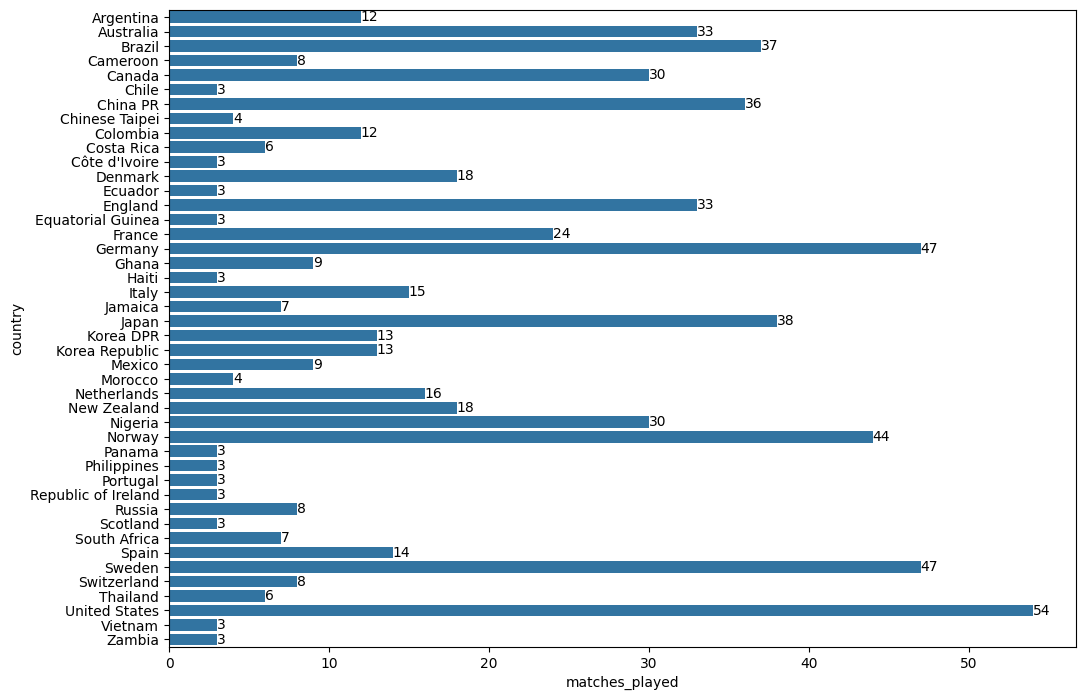

In [7]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(
    #ax = ax,
    data = matches_by_county_df,
    x = "matches_played",
    y = "country"
)
ax.bar_label(ax.containers[0]);



###Most games played by USA. Minimum number of games played by any team is 3. I would expect that teams who have played more matches will have received more yellow or red cards in the history of the tournament. Is that true? To answer this, we will need the number of yellow or red cards a team has received in the cup, in addition to the number of games a team has played.

In [8]:
#Do we have yellow and red card information?
match_data.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long'],
      dtype='object')

In [9]:
# Let's create a smaller dataframe that includes only columns related to our questions
card_data = match_data[["home_team", "away_team", "home_score", "away_score", 
            "Round", "Referee", "Notes", "Year", 'home_red_card', 'away_red_card', 
            'home_yellow_red_card',
            'away_yellow_red_card', 'home_yellow_card_long',
            'away_yellow_card_long']]

In [10]:
# Narrow down data to only matches in which a card was given, card_data
card_data = card_data[(card_data["away_yellow_card_long"].notna()) | 
          (card_data["home_yellow_card_long"].notna()) |
          (card_data["away_yellow_red_card"].notna()) |
          (card_data["home_yellow_red_card"].notna()) |
          (card_data["away_red_card"].notna()) |
          (card_data["home_red_card"].notna())]
card_data = card_data.reset_index(drop=True)

# What are the values in each card column?
card_data["home_yellow_card_long"].unique()
card_data["away_yellow_card_long"].unique()
# Notice that entries appear to be lists converted to strings. This will be important when we count the number of cards given

array(["['55’|1:0|Lauren Hemp']", "['45+1’|1:0|Katrina Gorry']",
       "['10’|0:0|Alex Greenwood', '90+5’|1:3|Chloe Kelly']", nan,
       "['61’|0:0|Damaris Egurrola']",
       "['41’|0:0|Chantelle Swaby', '45+1’|0:0|Drew Spence']",
       "['57’|3:0|Hanane Aït El Haj']", "['66’|1:0|Janni Thomsen']",
       "['119’|0:0|Julie Ertz']", "['51’|1:0|Manuela Vanegas']",
       "['90+6’|1:1|Marina Hegering']", "['20’|0:0|Olivia Schough']",
       "['39’|0:0|Rose Lavelle', '52’|0:0|Sophia Smith', '81’|0:0|Naomi Girma']",
       "['66’|0:1|Karen Holmgaard']", "['56’|0:3|Lucy Bronze']",
       "['45+1’|3:0|Olga Carmona', '89’|4:0|Oihane Hernández']",
       "['40’|0:2|Martha Tembo', '66’|1:2|Barbra Banda']",
       "['68’|0:3|Emily van Egmond', '81’|0:3|Mackenzie Arnold']",
       "['81’|0:1|Nouhaila Benzina']", "['54’|5:0|Katrina Guillou']",
       "['62’|0:1|Lorena Bedoya', '79’|0:1|Diana Ospina', '88’|0:1|Catalina Pérez']",
       "['44’|1:0|Luana']", "['31’|0:0|Deneisha Blackwood']",
      

In [11]:
# Create num_card_data and change nans to 0s
# I want to look at card_data again, so let's make changes in a new dataframe
num_card_data = card_data
num_card_data["home_red_card"] = num_card_data["home_red_card"].replace({
    np.nan : 0
})
num_card_data["away_red_card"] = num_card_data["away_red_card"].replace({
    np.nan : 0
})
num_card_data["home_yellow_card_long"] = num_card_data["home_yellow_card_long"].replace({
    np.nan : 0
})
num_card_data["away_yellow_card_long"] = num_card_data["away_yellow_card_long"].replace({
    np.nan : 0
})
num_card_data["home_yellow_red_card"] = num_card_data["home_yellow_red_card"].replace({
    np.nan : 0
})
num_card_data["away_yellow_red_card"] = num_card_data["away_yellow_red_card"].replace({
    np.nan : 0
})

In [12]:
# Create a dictionary of the number of cards a team has received in the cup

# Let's copy the keys from the team_appearances dictionary we already have every country listed in
card_dict = dict.fromkeys(team_appearances.keys(),0)

# We will check for cards in six columns of our dataframe, 3 for home team and 3 for away team
home_columns = ["home_yellow_card_long", "home_red_card", "home_yellow_red_card"]
away_columns = ["away_yellow_card_long", "away_red_card",  "away_yellow_red_card"]

# For each match, increase count for the listed home team for every entry in a card column
# An entry in a card column is a string that may represent multiple cards given
for i in range(0,300):
    team = num_card_data.loc[i,"home_team"]
    for column in home_columns:
        if num_card_data.loc[i,column] != 0:
            card_dict[team] +=  len(num_card_data.loc[i,column].split(",")) # Split string into individual cards, add count to country's card tally
    i += 1

for i in range(0,300):
     team = num_card_data.loc[i,"away_team"]
     for column in away_columns:
        if num_card_data.loc[i,column] != 0:
            card_dict[team] += len(num_card_data.loc[i,column].split(","))
     i += 1

card_dict

{'United States': 48,
 'Germany': 48,
 'Norway': 39,
 'China PR': 30,
 'Sweden': 38,
 'Japan': 26,
 'Brazil': 58,
 'Australia': 37,
 'England': 35,
 'France': 21,
 'Canada': 37,
 'Nigeria': 49,
 'Spain': 9,
 'Korea DPR': 21,
 'Netherlands': 12,
 'Italy': 17,
 'New Zealand': 16,
 'Argentina': 22,
 'Korea Republic': 17,
 'Denmark': 16,
 'Switzerland': 8,
 'Colombia': 17,
 'Jamaica': 11,
 'Ghana': 17,
 'Mexico': 11,
 'Chinese Taipei': 2,
 'South Africa': 12,
 "Côte d'Ivoire": 8,
 'Panama': 3,
 'Costa Rica': 4,
 'Cameroon': 15,
 'Thailand': 8,
 'Portugal': 6,
 'Morocco': 3,
 'Russia': 5,
 'Vietnam': 2,
 'Equatorial Guinea': 6,
 'Chile': 5,
 'Ecuador': 7,
 'Haiti': 2,
 'Scotland': 6,
 'Philippines': 4,
 'Republic of Ireland': 3,
 'Zambia': 6}

###Let's plot the number of cards vs. number of games per country

In [13]:
# Make a dataframe from card_dict and team_appearances dictionaries

# Create df from first dictionary, team_appearances
cards_vs_games_df = pd.DataFrame.from_dict(data=team_appearances, orient="index")

# Add new column to dataframe of card_dict
cards_vs_games_df["cards"] = card_dict

# Reset index
cards_vs_games_df = cards_vs_games_df.reset_index()

# Rename columns
cards_vs_games_df = cards_vs_games_df.rename(columns={"index":"country", 0:"games_played"})

Our best-fit line has a y-intercept of [2.66351836] and a slope of [[0.93362815]]


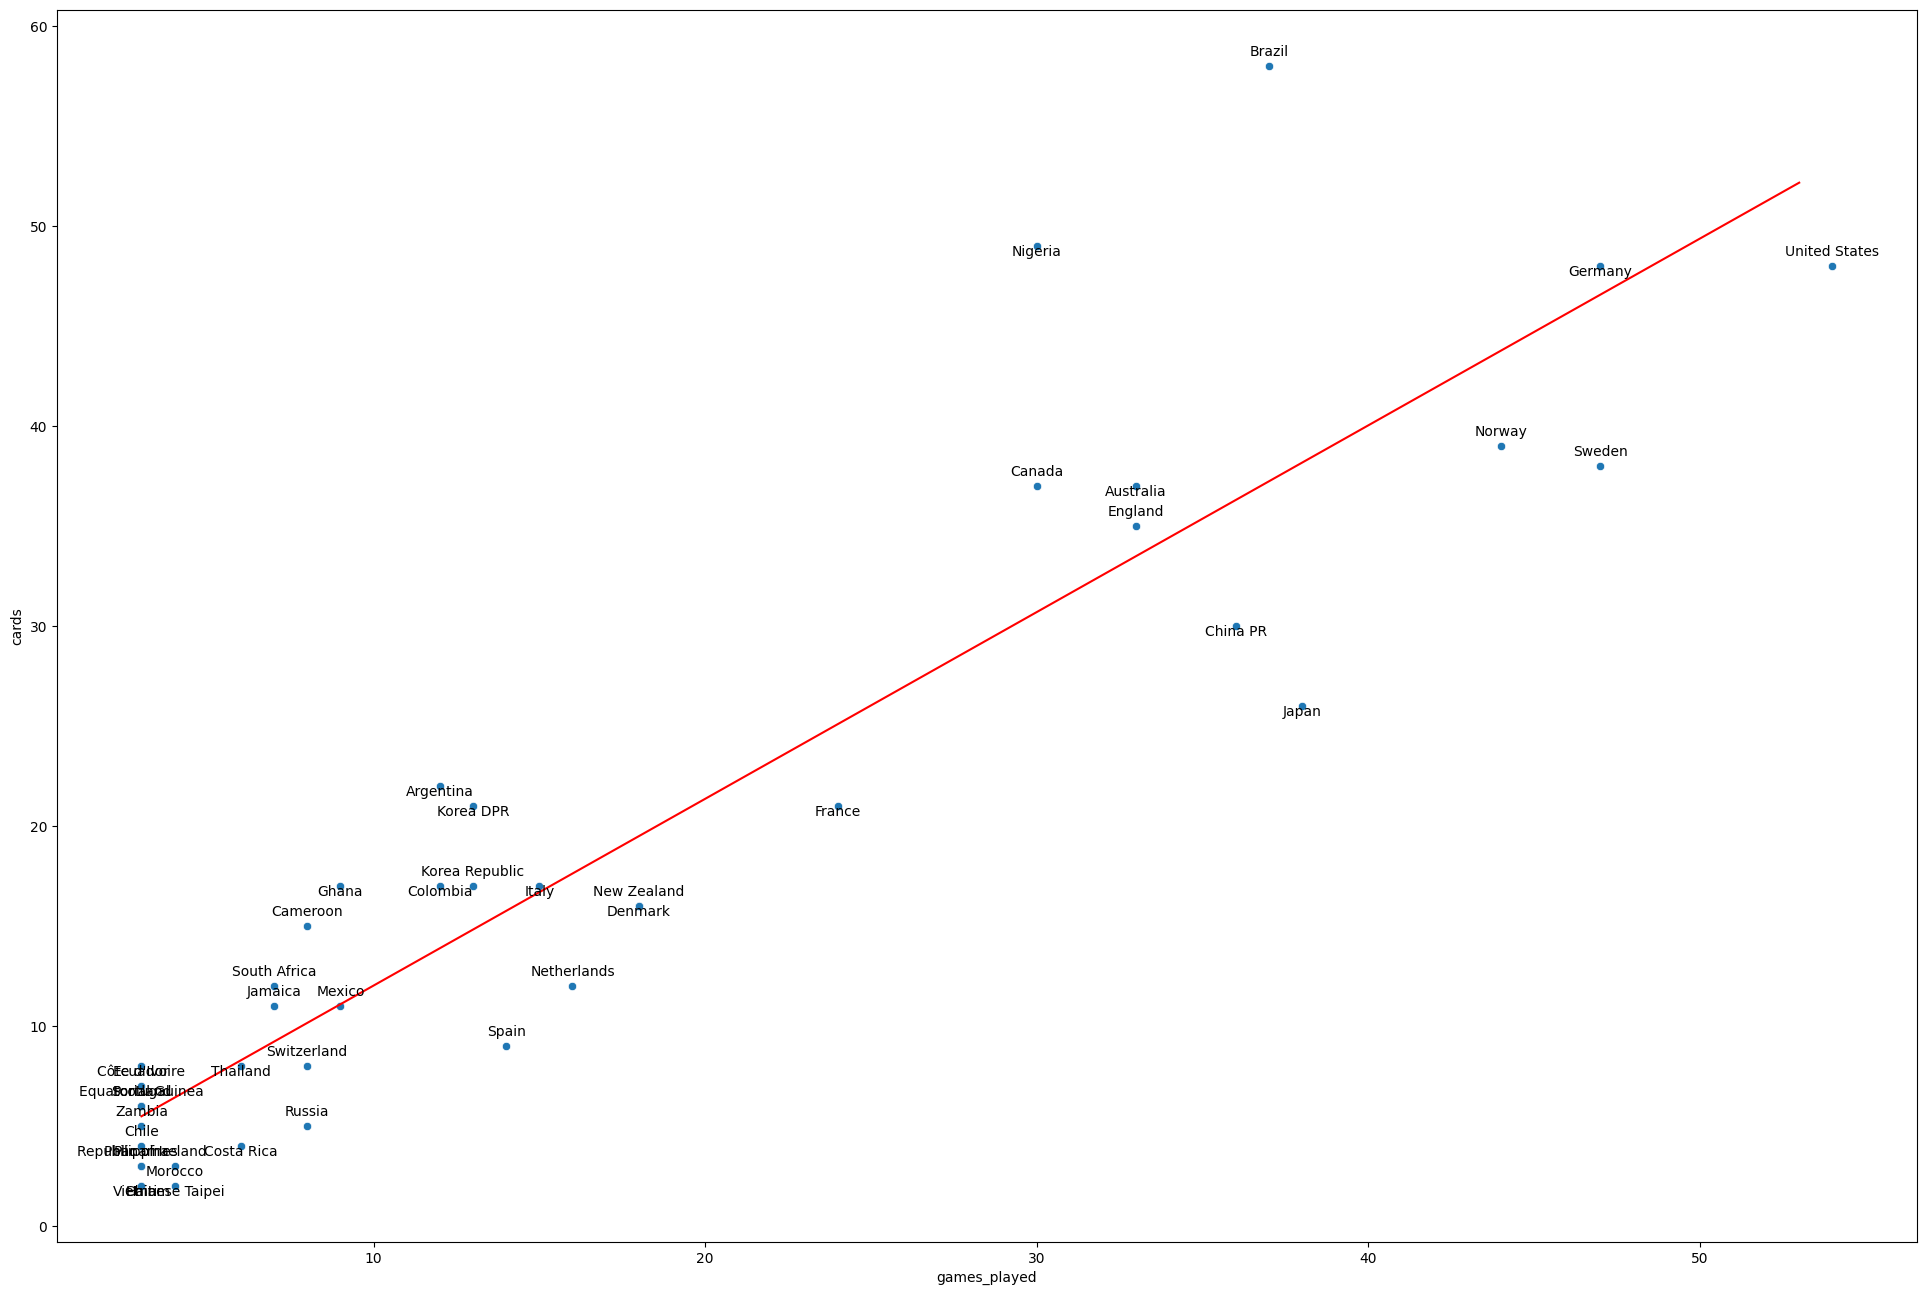

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and fit linear regression based on the number of matches a team has played 
# and the number of cards they have received in the cup.
lr = LinearRegression()
x_data = cards_vs_games_df[["games_played"]].values
y_data = cards_vs_games_df[["cards"]].values
lr.fit(x_data, y_data)

# Make the best fit line from linear regression
x_range=np.arange(start=cards_vs_games_df["games_played"].min(),stop=cards_vs_games_df["games_played"].max())
y_hat=lr.intercept_+lr.coef_[0]*x_range

# Set plot size
plt.figure(figsize=(24, 16))

# Create scatterplot
sns.scatterplot(data=cards_vs_games_df, x="games_played", y="cards")

# Function to calculate y-offset for labels, to reduce label overlap
def calculate_offset(i):
    return 0.5 * (-1) ** i  # Alternating offset for better readability

# Label datapoints in scatterplot with country name
for i, label in enumerate(cards_vs_games_df["country"]):
    plt.annotate(label, (cards_vs_games_df["games_played"][i], cards_vs_games_df["cards"][i]+ calculate_offset(i)), ha='center')

# Plot best-fit line
sns.lineplot(x=x_range,y=y_hat,color="red")

print("Our best-fit line has a y-intercept of",lr.intercept_, "and a slope of", lr.coef_)

See that the linear regression's correlation coefficient, or slope of our best-fit line, is close to 1. That indicates a nearly perfect positive correlation between the number of games a team plays, and the number of cards they receive in a match. Additionally, the intercept is about 2.6, which is close to 3, and 3 is the minimum number of games that a team has played in the cup. In other words, a team receives about one card per match.

Datapoints above our best-fit line represent countries whose teams have received more than the expected number of cards per matches played based on our linear regression. Datapoints below represent countries whose teams received less cards than expected.

